In [1]:
from IPython.display import Image

# Modern Cryptography

Generally speaking there are two *kinds* of encryption: symmetric and asymmetric.

In symmetric encryption, the parties involved share the ***same*** key.

In asymmetric encryption, the parties use ***different*** keys, that are mathematically ***related*** to each other.


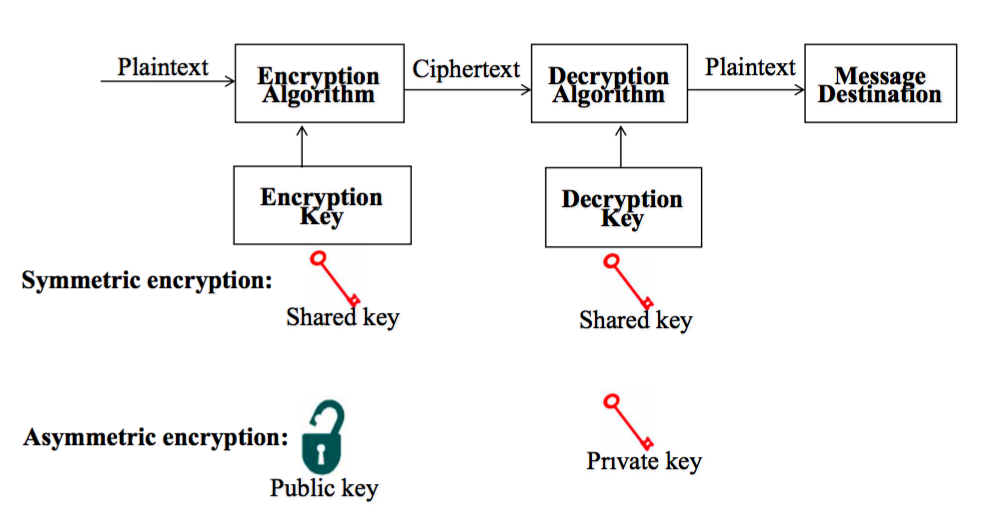

In [5]:
Image('/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/sym_vs_asym.png')

## Symmetric Encryption

In the following, we look at symmetric encryption algorithms. In symmetric crypto, we use the same key for encryption and decryption. **Therefore, the two parties need to establish a secret key between them.** Symmetric encryption can be up to 1000 times faster than asymmetric encryption. Given the support of some crypto algorithm in the CPU and at hardware level, even faster.

## *<font color=" #6495ED">Exercise</font>*

 - How should we share this secret key? securely, of course!

### Advanced Encryption Algorithm (AES)

AES is based on Rijndael encryption algorithm, designed by Joan Daemen and Vincent Rijmen. It was one of the algorithms submitted to U.S. National Institute of Standards and Technology (NIST) to replace DES and 3DES. It was published in 1998 and accepted and standardized in 2001.

 * AES supports key sizes of 128/192/256 bits
 * Block size: 128 bit
 * It's iterative rather than Feistel cipher
 * Treats data in 4 groups of 4 bytes
 * Operates on an entire block in every round
 * Resistant against known attacks
 * Speed and code compactness on many CPUs
 * Rijndael block and key size vary between 128, 192, 256
 * However, in AES block size in 128
 * Number of rounds a function of key size
  * 128 bits     10 rounds
  * 192 bits     12 rounds
  * 256 bits     14 rounds

 * Today most implementations use the CPU support (Intel AES-NI)

### Block cipher mode of operation

To encrypt messages of arbitrary size with block ciphers, we use the following algorithms, called the modes of operation. They define how to encrypt each block of the plaintext to produce the corresponding cipher text block. Some of these are completely insecure (ECB) and should not be used.

 * Electronic Codebook (ECB)
 * Cipher Block Chaining (CBC)
 * Counter (CTR)

### Electronic Codebook (ECB)

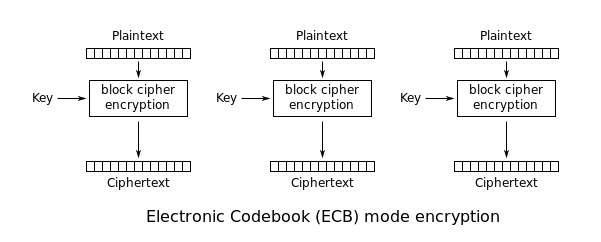

In [8]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/ECB_enc.png")

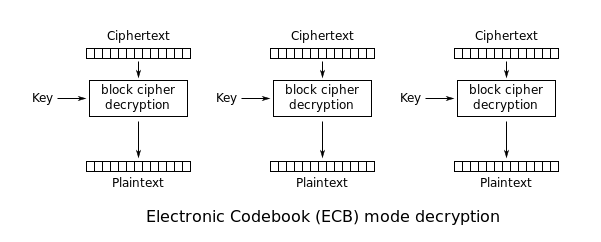

In [9]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/ECB_dec.png")

### Cipher Block Chaining (CBC)

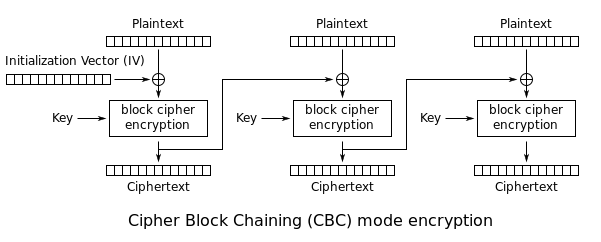

In [10]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/CBC_enc.png")

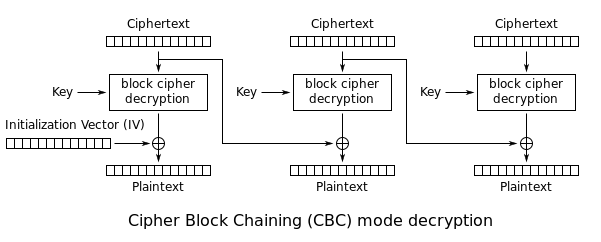

In [11]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/CBC_dec.png")

### Counter (CTR)

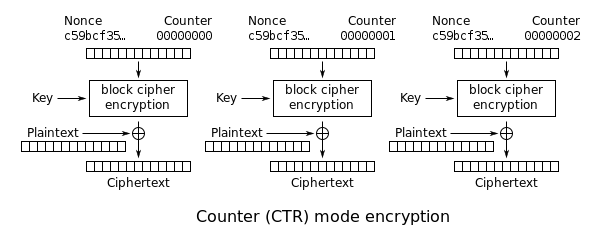

In [13]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/CTR_enc.png")

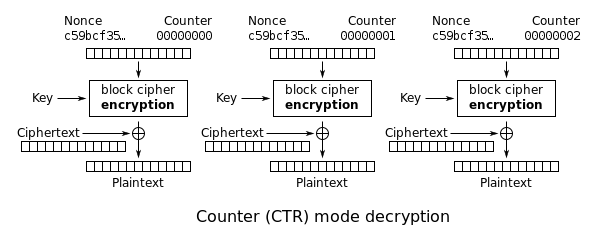

In [14]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/CTR_dec.png")

In [1]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
key = os.urandom(16) # in bytes, 128 bits
iv = os.urandom(16)

In [2]:
# ECB Mode, we only need a key
### *** DO NOT USE ECB. IT IS INSECURE *** ###

cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
encryptor = cipher.encryptor()
# note that we don't need padding here, since len("PyCon 2017 Cypto") = 16
cipher_text = encryptor.update(b"PyCon 2017 Cypto") + encryptor.finalize()

In [3]:
cipher_text

b'B\x18\x12\xf4\xfa\xf7\x11\x86!\xee{\xc2i\xcb\xc5\xef'

In [4]:
print (len(cipher_text))

16


In [5]:
decryptor = cipher.decryptor()
decryptor.update(cipher_text) + decryptor.finalize()

b'PyCon 2017 Cypto'

In [6]:
# CBC Mode, we also need an IV
cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())
encryptor = cipher.encryptor()
# note that we don't need padding here, since len("PyCon 2017 Cypto") = 16
cipher_text = encryptor.update(b"PyCon 2017 Cypto") + encryptor.finalize()

In [7]:
cipher_text

b'\xb3\x82\x84\x1c\x0fYb\x13\xbdKX\xf4\xd7D\x119'

In [8]:
decryptor = cipher.decryptor()
decryptor.update(cipher_text) + decryptor.finalize()

b'PyCon 2017 Cypto'

In [9]:
# CTR Mode, we don't need padding in CTR mode. In transforms a block cipher into a stream cipher
# we only need to introduce the nonce
cipher = Cipher(algorithms.AES(key), modes.CTR(os.urandom(16)), backend=default_backend())
encryptor = cipher.encryptor()
# len(b"PyCon 2017 Cypto!!") = 18, however no padding is needed.
cipher_text = encryptor.update(b"PyCon 2017 Cypto!!") + encryptor.finalize()

## *<font color=" #6495ED">Exercise</font>*

 - Encrypt the file following text using the ECB, and CBC or CTR mode and compare the results.

In [10]:
plain_text = b"PyCon is great!!" * 128

In [11]:
def print_text(text, b64=False):
    for i in range(0, 128, 16):
        if b64:
            pt = base64.b64encode(text[i:i+16])
        else:
            pt = text[i:i+16]
        print (pt)

In [ ]:
## IMPLEMENTATION

In [15]:
# ECB

cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
encryptor = cipher.encryptor()
cipher_text = encryptor.update(plain_text) + encryptor.finalize()
print_text(cipher_text)

b'\x95\x84\xbd\x17\x1dM\xf0\x08\x8a\xf3\xb6\xd1r\x01\x9e\x87'
b'\x95\x84\xbd\x17\x1dM\xf0\x08\x8a\xf3\xb6\xd1r\x01\x9e\x87'
b'\x95\x84\xbd\x17\x1dM\xf0\x08\x8a\xf3\xb6\xd1r\x01\x9e\x87'
b'\x95\x84\xbd\x17\x1dM\xf0\x08\x8a\xf3\xb6\xd1r\x01\x9e\x87'
b'\x95\x84\xbd\x17\x1dM\xf0\x08\x8a\xf3\xb6\xd1r\x01\x9e\x87'
b'\x95\x84\xbd\x17\x1dM\xf0\x08\x8a\xf3\xb6\xd1r\x01\x9e\x87'
b'\x95\x84\xbd\x17\x1dM\xf0\x08\x8a\xf3\xb6\xd1r\x01\x9e\x87'
b'\x95\x84\xbd\x17\x1dM\xf0\x08\x8a\xf3\xb6\xd1r\x01\x9e\x87'


In [18]:
# CBC

cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())
encryptor = cipher.encryptor()
cipher_text = encryptor.update(plain_text) + encryptor.finalize()
print_text(cipher_text)

b'\xc1W\x8dv\xa0w\x9d\xc2D\x06\xd2Ou-\x8d\xc2'
b'\x115NK\xdf\xca\xdb\x8fH\x1d\xdcb\x88\xf6\x14g'
b'\x82{%#-o\xed\x88Y\xaa\xff\x08K}&\xa8'
b'npaa\xe4\x96\x88\x1d4\x95\xa8x\xde<\xddV'
b'\xf2\xf3D\x16\x17Fc9\xa5\x96\xfd\xa8\x93)\xc24'
b'\xf0\x89\xc4\xec\xbb\xde\xef~\xd7\x1eb\x06\x8aA\xd2\xb2'
b')$\x9fz\xf7\xe1o\xb7\x01\x01R\x82(\xe5\x8am'
b'D\xe4\xa0\xf2\xb4^\xce\xb08z\xcb\xf2\x81\x83\x13v'


In [19]:
# CTR

cipher = Cipher(algorithms.AES(key), modes.CTR(iv), backend=default_backend())
encryptor = cipher.encryptor()
cipher_text = encryptor.update(plain_text) + encryptor.finalize()
print_text(cipher_text)

b'\xf9\x80X\xa1w\xfa`\xc7\xb84\xec\xc8\\6\xe3F'
b'g\x89\xe6\xe3\x1fT5\x11\x8c\x9b\xeas\xa0Z!\x0f'
b'\x86?\xc0\xfe\x98\x13\xf4-\xf0\xcb*^z\xf0\xd0\xca'
b'm;;\x10\xeb\xc7\x04f\xab\xa9\x0c\x98\x7f\xf3\x11\xdf'
b'\xc2\xb2S.Zm\xa9\x04\xc7\xc0+|\x88\xdb\xdfx'
b'\x15\x00\x94\xc8\x90\x99-\xfc5\x86\xc9DIs\x8d\x8c'
b'\x99\x92R\xf8\x98L\xa5\xeb\xa1\th\xba\x8b\xc4\x99\x8e'
b'\xd4\x9d4\xbb\x1b\xc4\xf0\xc2\x17\xc9#\xda#w\xe0\xd7'


## *<font color=" #6495ED">Extra Activity</font>*

Encrypt the file "include/tux.png" using the ECB, and CBC or CTR mode and compare the results.
 - **You need to install the [pillow](https://python-pillow.org/) library**
     - read the image file and get all the pixel values
     - encrypt the pixel values
     - create a new image with new (encrypted) pixel values
     - write your newly crafted image to disk

To install Pillow, simply use pip or conda:

```bash
 pip install Pillow
 conda install pillow
```

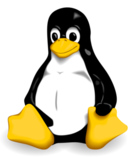

In [15]:
# original
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/tux.png")

<br>
ECB Encryption of the image with two different keys. The results (colors) are different, because we are using two different keys. However, the patterns inside the data (image) is not hidden.
<br>
<br>

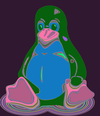

In [16]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/ECB2.png")

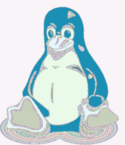

In [18]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/ECB1.png")

<br>
As compared to when we are using the CBC (or CTR) mode. Because we introduce the randomness at the beginning (IV), and we carry this randomness (noise) throughout the encryption the patterns are diminished.
<br>
<br>


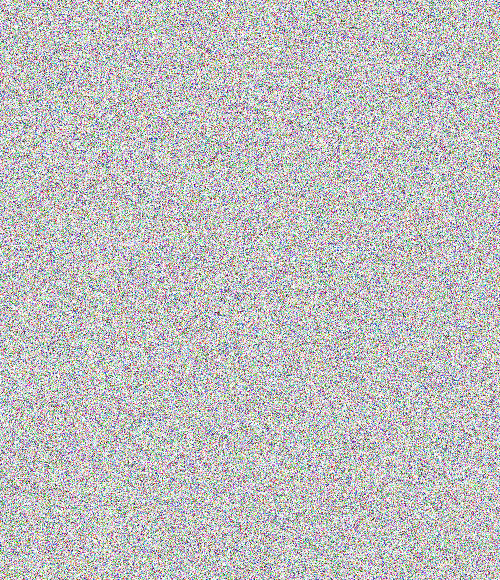

In [17]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/CBC1.png")

## Encryption alone is not good enough

Encrypting your data alone will not protect you from data tampering, meaning an adversary can change the results of your decryption without having access to the key -- all without you noticing. That's where HMACs discussed previously become handy.

### Bit flipping attack

Since the IV is sent in clear we can change the IV value and change the corresponding plaintext, when using CBC mode.

***Encryption***

 - $C_{i}=E_{K}(P_{i}\oplus C_{i-1})$
 - $ C_{0}=IV$

***Decryption***
 - $P_{i}=D_{K}(C_{i})\oplus C_{i-1}$
 - $C_{0}=IV$
 
 
Therefore to change the plaintext value we just need to xor the old plaintext(p), and the new value (t), with the IV:

$IV = IV \oplus p \oplus t$

Meaning if the first 4 bytes of the plaint text are: "1234" and we want to change it to "6789" all we have to do is

$IV[0:4] = IV[0:4] \oplus 1234 \oplus 6789$

## *<font color=" #6495ED">Exercise</font>*

 - Imagine the message is only 16 bytes, "PyCon2017 Crypto". Change the year from 2017 to 1991.

In [20]:
def xor(s1, s2):
    return bytes([a ^ b for a,b in zip(s1,s2)])

In [21]:
iv = os.urandom(16)
cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())
encryptor = cipher.encryptor()
cipher_text = encryptor.update(b"PyCon2017 Crypto") + encryptor.finalize()

In [22]:
cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())
decryptor = cipher.decryptor()
decryptor.update(cipher_text) + decryptor.finalize()

b'PyCon2017 Crypto'

In [23]:
## IMPLEMENTATION

<br>

## Authenticated Encryption with Associated Data (AEAD)

AEAD provides confidentiality, integrity, and authenticity at once. Such schemes help to mitigate against the bit flipping attacks that we just did. The Galois/Counter Mode (GCM) mode of operation is the recommended schemes to be used. Fortunately, the *cryptography* library already has it implemented.

In [31]:
# GCM Mode, we also need an IV
cipher = Cipher(algorithms.AES(key), modes.GCM(iv), backend=default_backend())
encryptor = cipher.encryptor()
# note that we don't need padding here, since len("PyCon2017 Crypto") = 16
encryptor.authenticate_additional_data(b"SOME ADDITIONAL DATA")
cipher_text = encryptor.update(b"Snehil") + encryptor.finalize()
tag = encryptor.tag

In [32]:
decryptor = Cipher(algorithms.AES(key), modes.GCM(iv,tag), backend=default_backend()).decryptor()
decryptor.authenticate_additional_data(b"SOME ADDITIONAL DATA")
decryptor.update(cipher_text) + decryptor.finalize()

b'Snehil'

## Padding

With some block cipher mode of operations (e.g., CBC) we need to pad the data to the block size. Otherwise, if would throw an exception.

In [26]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
key = os.urandom(16) # in bytes, 128 bits

#CTR
cipher = Cipher(algorithms.AES(key), modes.CTR(os.urandom(16)), backend=default_backend())
encryptor = cipher.encryptor()
# len("PyCon 2017 Cryptography") = 23, but we don't need padding in CTR
ctr_ct = encryptor.update(b"PyCon 2017 Cryptography") + encryptor.finalize()

In [27]:
#CBC
cipher = Cipher(algorithms.AES(key), modes.CBC(os.urandom(16)), backend=default_backend())
encryptor = cipher.encryptor()
# len("PyCon 2017 Cryptography") = 23, throws an exception
cbc_ct = encryptor.update(b"PyCon 2017 Cryptography") + encryptor.finalize()

ValueError: The length of the provided data is not a multiple of the block length.

### Public-Key Cryptography Standards (PKCS)

PKCS7 padding is described in RFC 5652. The number of missing bytes (n) to the whole block size is repeated n times.

 - For example if the block size is 16,
   - The data is of size 13, the data is padding with 3, 3 times. 03 03 03.
   - The data is of size 14, the data is padded with 2, 2 times. 02 02


In [30]:
# padding

from cryptography.hazmat.primitives import padding

msg = b"Snehil"
print("msg: ", msg)
padder = padding.PKCS7(128).padder()
padded_data = padder.update(msg)
padded_data += padder.finalize()
print("padded data: " ,padded_data)

msg:  b'Snehil'
padded data:  b'Snehil\n\n\n\n\n\n\n\n\n\n'
